In [1]:
# Table
import pandas as pd
import numpy as np
import datetime

# Graphic
import seaborn as sns
import missingno as msno

# Classification Algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Classification
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Step-1 Load data
# Add column name to make data easier to interpret
columns = ['Age','Workclass','Final_Weight','Education','Education Num','Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
            'Hours/Week','Country','Above 50K']

train=pd.read_csv('adult.data', names=columns, delimiter =' *, *', engine='python')
test=pd.read_csv('adult.test', names=columns, delimiter =' *, *', engine='python')
test = test.iloc[1:] # ignore first row ('1x3 Cross validator')

#Check column correctly set
print("=================TRAIN================")
print(train.head(2))
print(train.shape)
print("=================TEST==================")
print(test.head(2))
print(test.shape)

=================TRAIN================
   Age         Workclass  Final_Weight  Education  Education Num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   

       Marital Status       Occupation   Relationship   Race   Sex  \
0       Never-married     Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse  Exec-managerial        Husband  White  Male   

   Capital Gain  Capital Loss  Hours/Week        Country Above 50K  
0          2174             0          40  United-States     <=50K  
1             0             0          13  United-States     <=50K  
(32561, 15)
=================TEST==================
  Age Workclass  Final_Weight Education  Education Num      Marital Status  \
1  25   Private      226802.0      11th            7.0       Never-married   
2  38   Private       89814.0   HS-grad            9.0  Married-civ-spouse   

          Occupation Relationship   Race   Sex  Cap

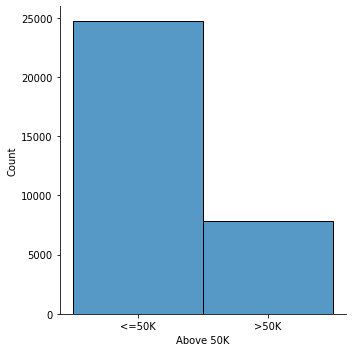

In [3]:
sns.displot(train['Above 50K'])

In [4]:
#Step-2 Analyse (missing values: null)
print("=================TRAIN================")
print(train.isnull().sum())
print("=================TRAIN================")
print(test.isnull().sum())

=================TRAIN================
Age               0
Workclass         0
Final_Weight      0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Above 50K         0
dtype: int64
=================TRAIN================
Age               0
Workclass         0
Final_Weight      0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Above 50K         0
dtype: int64


In [5]:
#Step-2 Analyse (missing values: ?)
print("=================TRAIN================")
print(train.isin(["?"]).sum())
print("=================TRAIN================")
print(test.isin(["?"]).sum())

=================TRAIN================
Age                  0
Workclass         1836
Final_Weight         0
Education            0
Education Num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Country            583
Above 50K            0
dtype: int64
=================TRAIN================
Age                 0
Workclass         963
Final_Weight        0
Education           0
Education Num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Country           274
Above 50K           0
dtype: int64


In [6]:
#Step-2 Analyse (data features)
print("=================TRAIN================")
print(train.describe()) 
print("=================TEST==================")
print(test.describe()) 

=================TRAIN================
                Age  Final_Weight  Education Num  Capital Gain  Capital Loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

         Hours/Week  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  
=================TEST==================
  

In [7]:
#Step-3 Preprocess (remove instance with missing values)
train = train.replace('?', np.nan)
train.dropna(how='any',inplace=True)

test = test.replace('?', np.nan)
test.dropna(how='any',inplace=True)

print("=================TRAIN================")
print(train.isin(["?"]).sum()) # check if successful
print("=================TEST==================")
print(test.isin(["?"]).sum()) # check if successful

=================TRAIN================
Age               0
Workclass         0
Final_Weight      0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Above 50K         0
dtype: int64
=================TEST==================
Age               0
Workclass         0
Final_Weight      0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Above 50K         0
dtype: int64


In [8]:
#Step-3 Preprocess (remove full stop in Above/Below 50K )
print("=================TRAIN================")
train = train.replace("<=50K.", "<=50K")
train = train.replace(">50K.", ">50K")
train = train.replace("<=50K", "1")
train = train.replace(">50K", "0")
print(train.head(2))

print("=================TEST==================")
test = test.replace("<=50K.", "<=50K")
test = test.replace(">50K.", ">50K")
test = test.replace("<=50K", "1")
test = test.replace(">50K", "0")
print(test.head(2))

=================TRAIN================
   Age         Workclass  Final_Weight  Education  Education Num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   

       Marital Status       Occupation   Relationship   Race   Sex  \
0       Never-married     Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse  Exec-managerial        Husband  White  Male   

   Capital Gain  Capital Loss  Hours/Week        Country Above 50K  
0          2174             0          40  United-States         1  
1             0             0          13  United-States         1  
=================TEST==================
  Age Workclass  Final_Weight Education  Education Num      Marital Status  \
1  25   Private      226802.0      11th            7.0       Never-married   
2  38   Private       89814.0   HS-grad            9.0  Married-civ-spouse   

          Occupation Relationship   Race   Sex  Capital Gain  C

In [9]:
#Step-3 Preprocess (remove unnessary columns)
# Education has numerical column 
train = train.drop('Education', axis =1) 
test = test.drop('Education', axis =1)

#final weight is an irrelevant feature
train = train.drop('Final_Weight', axis =1)
test = test.drop('Final_Weight', axis =1)

print("=================TRAIN================")
print(train.head(1))

print("=================TEST==================")
print(test.head(1))


=================TRAIN================
   Age  Workclass  Education Num Marital Status    Occupation   Relationship  \
0   39  State-gov             13  Never-married  Adm-clerical  Not-in-family   

    Race   Sex  Capital Gain  Capital Loss  Hours/Week        Country  \
0  White  Male          2174             0          40  United-States   

  Above 50K  
0         1  
=================TEST==================
  Age Workclass  Education Num Marital Status         Occupation Relationship  \
1  25   Private            7.0  Never-married  Machine-op-inspct    Own-child   

    Race   Sex  Capital Gain  Capital Loss  Hours/Week        Country  \
1  Black  Male           0.0           0.0        40.0  United-States   

  Above 50K  
1         1  


In [10]:
#Step-3 Convert categorical features to numerical (TRAIN)
categorical_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']

#for each variable in the categorical variable list
for var in categorical_vars:
    categorical_list = 'var' + '_' + var
    categorical_list = pd.get_dummies(train[var], prefix = var)
    train = train.join(categorical_list)

data_vars = train.columns.values.tolist()
to_keep = [i for i in data_vars if i not in categorical_vars]

train = train[to_keep]  
train['Above 50K'] = LabelEncoder().fit_transform(train['Above 50K'])

train.columns.values
print(train.head(1))

   Age  Education Num  Capital Gain  Capital Loss  Hours/Week  Above 50K  \
0   39             13          2174             0          40          1   

   Workclass_Federal-gov  Workclass_Local-gov  Workclass_Private  \
0                      0                    0                  0   

   Workclass_Self-emp-inc  ...  Country_Portugal  Country_Puerto-Rico  \
0                       0  ...                 0                    0   

   Country_Scotland  Country_South  Country_Taiwan  Country_Thailand  \
0                 0              0               0                 0   

   Country_Trinadad&Tobago  Country_United-States  Country_Vietnam  \
0                        0                      1                0   

   Country_Yugoslavia  
0                   0  

[1 rows x 88 columns]


In [11]:
#Step-3 Preprocess Convert categorical features to numerical (TEST)
categorical_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']

#for each variable in the categorical variable list
for var in categorical_vars:
    categorical_list = 'var' + '_' + var
    categorical_list = pd.get_dummies(test[var], prefix = var)
    test = test.join(categorical_list)

data_vars = test.columns.values.tolist()
to_keep = [i for i in data_vars if i not in categorical_vars]

test = test[to_keep]  
test['Above 50K'] = LabelEncoder().fit_transform(test['Above 50K'])

test.columns.values
print(test.head(1))

  Age  Education Num  Capital Gain  Capital Loss  Hours/Week  Above 50K  \
1  25            7.0           0.0           0.0        40.0          1   

   Workclass_Federal-gov  Workclass_Local-gov  Workclass_Private  \
1                      0                    0                  1   

   Workclass_Self-emp-inc  ...  Country_Portugal  Country_Puerto-Rico  \
1                       0  ...                 0                    0   

   Country_Scotland  Country_South  Country_Taiwan  Country_Thailand  \
1                 0              0               0                 0   

   Country_Trinadad&Tobago  Country_United-States  Country_Vietnam  \
1                        0                      1                0   

   Country_Yugoslavia  
1                   0  

[1 rows x 87 columns]


In [12]:
#Step-3 Preprocess (Remove unnessary column from train)
missing_cols = set(train) - set(test) #find missing column
print(missing_cols)
train.drop(['Country_Holand-Netherlands'] , axis=1 , inplace=True)

#check if successful
print("=================TRAIN================")
print(train.shape)
print("=================TEST==================")
print(test.shape)

{'Country_Holand-Netherlands'}
=================TRAIN================
(30162, 87)
=================TEST==================
(15060, 87)


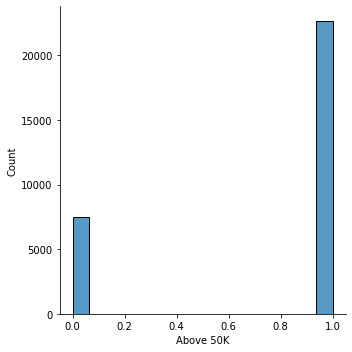

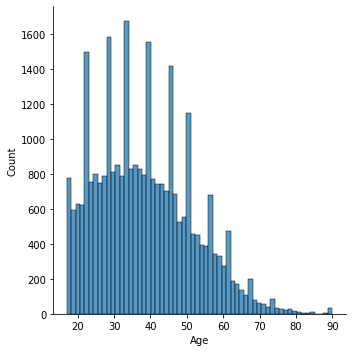

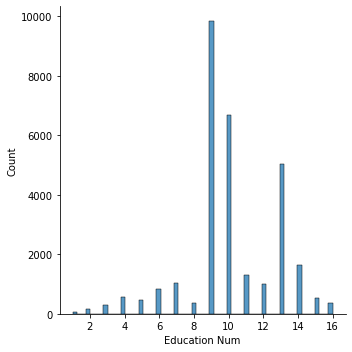

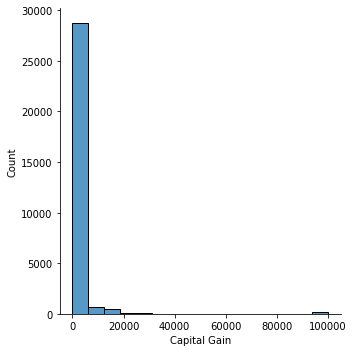

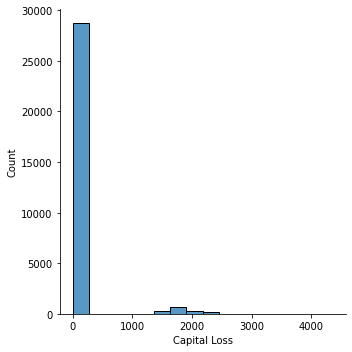

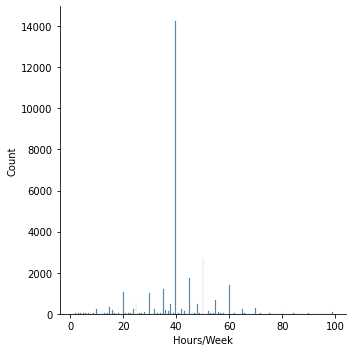

In [13]:
#Step-4 Exploratory Data Analysis
sns.displot(train['Above 50K'])
sns.displot(train['Age'])
sns.displot(train['Education Num'])
sns.displot(train['Capital Gain'])
sns.displot(train['Capital Loss'])
sns.displot(train['Hours/Week'])

In [14]:
#Split data into train and test set
X_train = train.drop(['Above 50K'], axis = 1)
y_train = train['Above 50K']
X_test = test.drop(['Above 50K'], axis = 1)
y_test = test['Above 50K']

In [15]:
#Method to print clasification result
def PrintResult(classifier, label):
    start_time = datetime.datetime.now() #start timer
    classifier.fit(X_train, y_train) #get param classifier to fit data
    y_pred = classifier.predict(X_test) #get predictions after data has been fitted
    end_time = datetime.datetime.now() #get time at end of regression fitting
    duration = (end_time - start_time).total_seconds() #get total time it takes for model to run


#Performance Metrics : 
    accuracy = accuracy_score(y_test, y_pred) # accuracy
    precision = precision_score(y_test, y_pred)  # precision
    recall = recall_score(y_test, y_pred) #recall
    F1 = f1_score(y_test, y_pred) #F1-Score
    AUC = roc_auc_score(y_test, y_pred) #AUC

# Table    
    print("--------------------------")
    print("Classifier: " + label)
    print(label + ' Accuracy Score : %0.2f ' % accuracy)
    print(label + ' Precision Score : %0.2f ' % precision)
    print(label + ' Recall Score : %0.2f ' % recall)
    print(label + ' F1 Score : %0.2f ' % F1)
    print(label + ' Auc Score : %0.2f ' % AUC)
    print("Execution time: {t:.3f} seconds".format(t = duration))
    print("--------------------------")

In [16]:
#KNN (1)
PrintResult(KNeighborsClassifier(), "KNN")

--------------------------
Classifier: KNN
KNN Accuracy Score : 0.84 
KNN Precision Score : 0.89 
KNN Recall Score : 0.90 
KNN F1 Score : 0.90 
KNN Auc Score : 0.78 
Execution time: 21.939 seconds
--------------------------


In [17]:
#NB (2)
PrintResult(GaussianNB(), "Naive Bayes")

--------------------------
Classifier: Naive Bayes
Naive Bayes Accuracy Score : 0.79 
Naive Bayes Precision Score : 0.93 
Naive Bayes Recall Score : 0.78 
Naive Bayes F1 Score : 0.85 
Naive Bayes Auc Score : 0.80 
Execution time: 0.266 seconds
--------------------------


In [18]:
#SVM (3)
PrintResult(SVC(), "SVM")

--------------------------
Classifier: SVM
SVM Accuracy Score : 0.80 
SVM Precision Score : 0.80 
SVM Recall Score : 0.97 
SVM F1 Score : 0.88 
SVM Auc Score : 0.62 
Execution time: 145.796 seconds
--------------------------


In [19]:
#DT (4)
PrintResult(DecisionTreeClassifier(), "Decision Tree")

--------------------------
Classifier: Decision Tree
Decision Tree Accuracy Score : 0.81 
Decision Tree Precision Score : 0.88 
Decision Tree Recall Score : 0.87 
Decision Tree F1 Score : 0.87 
Decision Tree Auc Score : 0.75 
Execution time: 0.530 seconds
--------------------------


In [20]:
#RF (5)
PrintResult(RandomForestClassifier(), "Random Forest")

--------------------------
Classifier: Random Forest
Random Forest Accuracy Score : 0.84 
Random Forest Precision Score : 0.88 
Random Forest Recall Score : 0.91 
Random Forest F1 Score : 0.90 
Random Forest Auc Score : 0.77 
Execution time: 5.975 seconds
--------------------------


In [21]:
#AB (6)
PrintResult(AdaBoostClassifier(), "AdaBoost")

--------------------------
Classifier: AdaBoost
AdaBoost Accuracy Score : 0.85 
AdaBoost Precision Score : 0.88 
AdaBoost Recall Score : 0.93 
AdaBoost F1 Score : 0.91 
AdaBoost Auc Score : 0.78 
Execution time: 6.519 seconds
--------------------------


In [22]:
#GB (7)
PrintResult(GradientBoostingClassifier(), "Gradient Boosting")

--------------------------
Classifier: Gradient Boosting
Gradient Boosting Accuracy Score : 0.87 
Gradient Boosting Precision Score : 0.88 
Gradient Boosting Recall Score : 0.95 
Gradient Boosting F1 Score : 0.91 
Gradient Boosting Auc Score : 0.78 
Execution time: 5.947 seconds
--------------------------


In [23]:
#LD (8)
PrintResult(LinearDiscriminantAnalysis(), "Linear Discriminant")

--------------------------
Classifier: Linear Discriminant
Linear Discriminant Accuracy Score : 0.84 
Linear Discriminant Precision Score : 0.87 
Linear Discriminant Recall Score : 0.92 
Linear Discriminant F1 Score : 0.90 
Linear Discriminant Auc Score : 0.76 
Execution time: 0.927 seconds
--------------------------


In [24]:
#MLP (9)
PrintResult(MLPClassifier(), "MLP")

--------------------------
Classifier: MLP
MLP Accuracy Score : 0.84 
MLP Precision Score : 0.89 
MLP Recall Score : 0.91 
MLP F1 Score : 0.90 
MLP Auc Score : 0.78 
Execution time: 5.678 seconds
--------------------------


In [25]:
#LR (10)
PrintResult(LogisticRegression(solver='lbfgs', max_iter=10000), "Logistic Regression")

--------------------------
Classifier: Logistic Regression
Logistic Regression Accuracy Score : 0.85 
Logistic Regression Precision Score : 0.88 
Logistic Regression Recall Score : 0.93 
Logistic Regression F1 Score : 0.90 
Logistic Regression Auc Score : 0.77 
Execution time: 19.579 seconds
--------------------------
